# Analyzing Vehicules theft during Summer in San Francisco and Seattle

## Vehicule Theft during summer time in SF and Seattle 

During summer time in 2014 both cities, San Francisco and Seattle, registered several Vehicle thefts (3057 in Seattle and 1966 in San Francisco). 

We have identified that majority of cases in Seattle occured between 8 PM and 11 PM, being VEHICLE THEFTS the 2nd offense during evening hours after CAR PROWLING, while San Francisco has a larger timeframe where most of VEHICLE THEFT occurs, starting at 4PM till midnight. On the other hand, San Francisco has LARCENY/THEFT, ASSAULTS and OTHER OFFENSES as primary reports during evening time, being LARCENY/THEFT the most important offense type representing more than 50% of the events during evening hours.

In the following article there will be supporting visualizations for each of this statements including an explanation onhow to build the visualizations.


## Connect to data sources and retrieve data

In [1]:
seattle <- read.csv("https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv")

In [2]:
sf <- read.csv("https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv")

## Data Cleaning and manipulation for use during analysis

In [3]:
#Do some data manipulation to San Francisco Data Source to get Dates in a proper way to be use later in the Kernel
#1. Create a new column (TimeHour) to parse Time as a POSIXct object so it's accesible later
sf$TimeHour <- as.POSIXct(paste(Sys.Date(), sf$Time))

#2. Create a new column (AsDate) to parse Date as a Date object so it's accesible later
sf$AsDate <- as.Date(sf$Date, format = paste("%m/%d/%Y"))

In [4]:
#Do some data manipulation to Seattle Data Source to get Dates in a proper way to be use later in the Kernel
#1. Create a new column (TimeHour) to parse Occurred.Date as a POSIXct object so it's accesible later
seattle$TimeHour <- as.POSIXct(seattle$Occurred.Date.or.Date.Range.Start, format = "%m/%d/%Y %I:%M:%S %p")
#2. Create a new column (DayOfWeek) to have direct access to the day of the event's day of the week
seattle$DayOfWeek <- strftime(seattle$TimeHour,'%A')

In [5]:
#import external libraries
library(ggplot2) #To create charts

## Support visualizations with explanation on how to build each item

### Number of VEHICLE THEFTS per city 

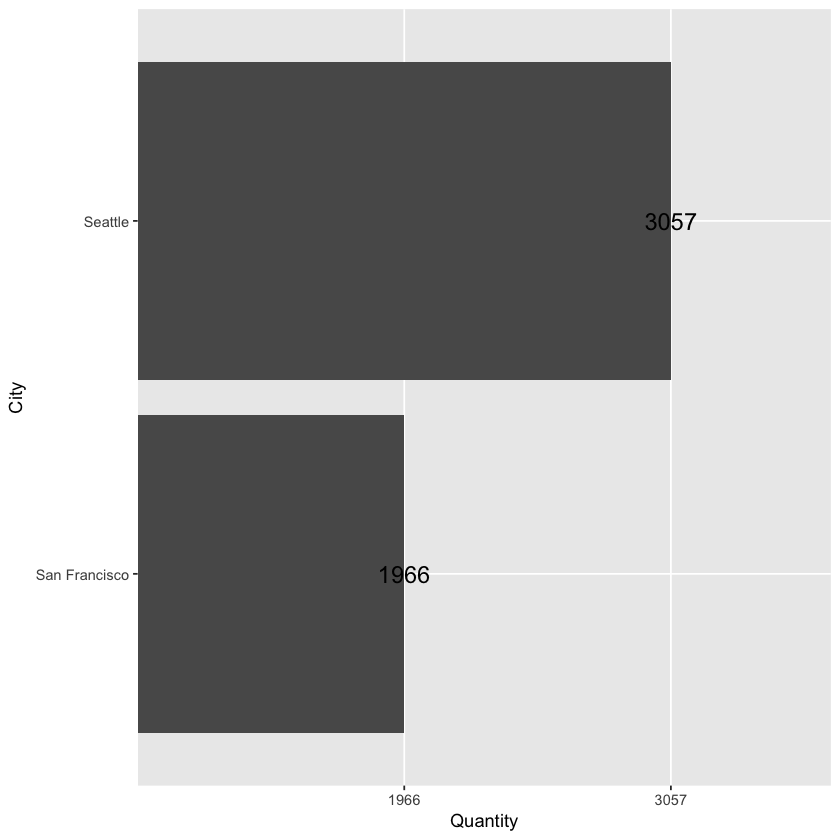

In [6]:
#Gather VEHICLE THEFT from Seattle
ds_seattle_vehicle_theft_only <- seattle[seattle$Summarized.Offense.Description ==  "VEHICLE THEFT",]
seattle_vehicle_theft_qty <- length(ds_seattle_vehicle_theft_only$Summarized.Offense.Description)

#Gather VEHICLE THEFT from San Francisco
ds_sf_vehicle_theft_only <- sf[sf$Category ==  "VEHICLE THEFT",]
sf_vehicle_theft_qty <- length(ds_sf_vehicle_theft_only$Category)

#Create a Matrix to include both quantities
m <- matrix(c('Seattle', seattle_vehicle_theft_qty,'San Francisco', sf_vehicle_theft_qty),ncol=2,byrow=TRUE)
colnames(m) <- c("City","Quantity")
m <- as.table(m)
#Transform as Data Frame to send to ggplot
ds_qty <- as.data.frame.matrix(m) 

#Plot the chart
g <- ggplot(ds_qty, aes(City, Quantity))
g  +  geom_col() + coord_flip() +
  geom_text(aes(y = Quantity, label = Quantity), size = 5)

## Analyzing the details by City

### Seattle

#### During what periods of the day are VEHICLE THEFT most common?

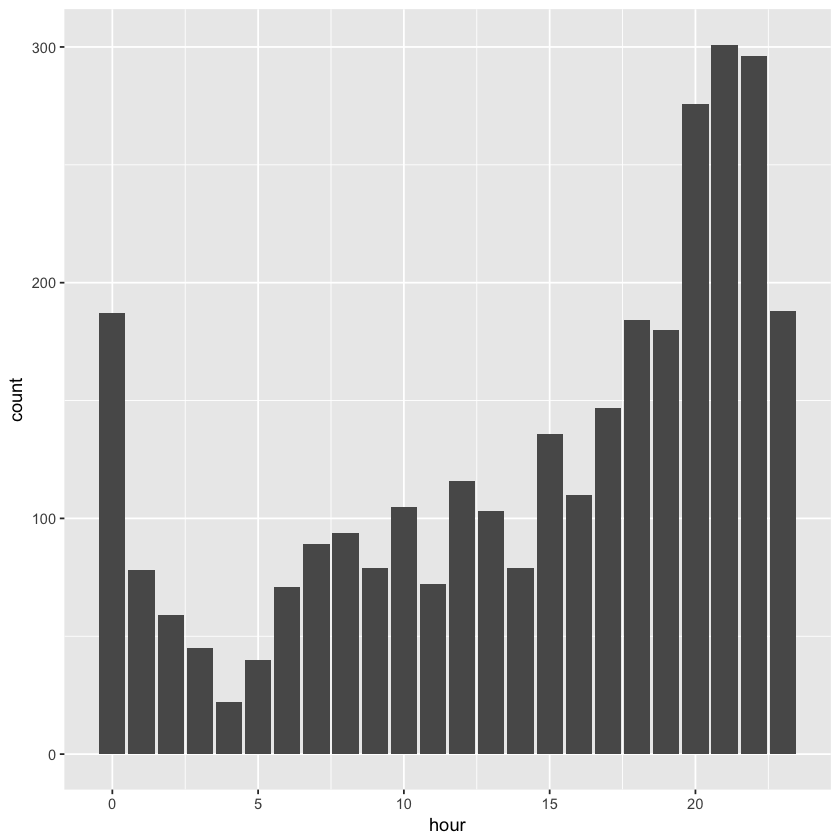

In [7]:
#prepare a dataframe with hours and category only
ds_seattle_robbery <- data.frame(hour = as.numeric(substr(seattle$TimeHour, 12, 13)), type = seattle$Summarized.Offense.Description)
#filter only incidents of type VEHICLE THEFT
ds_seattle_robbery_only <- ds_seattle_robbery[ds_seattle_robbery$type ==  "VEHICLE THEFT",]

g1 <- ggplot(ds_seattle_robbery_only, aes(hour))
g1 +  geom_bar()

#### What other type of offenses occurs during evening hours?

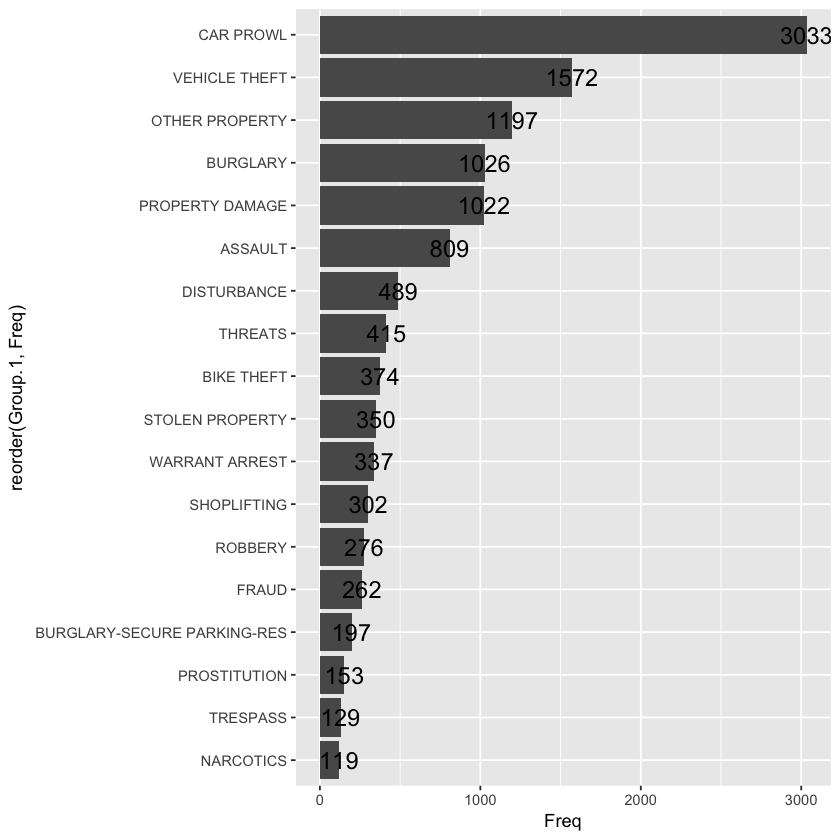

In [8]:
#prepare a dataframe with hours and category only
ds_seattle_evening <- data.frame(hour = as.numeric(substr(seattle$TimeHour, 12, 13)), type = seattle$Summarized.Offense.Description)
#filter only incidents that occur during evening (between 5 pm and 11 pm)
ds_seattle_evening_only <- ds_seattle_evening[ds_seattle_evening$hour >  16 & ds_seattle_evening$hour <= 23,]

#Use table to count elements and agregate by Type
items_sum_seattle_evening_only = as.data.frame(table(ds_seattle_evening_only))
items_sum_seattle_evening_only_agg <- aggregate(items_sum_seattle_evening_only[c("Freq")], by=list(items_sum_seattle_evening_only$type), "sum")

#Remove types with less that 100 occurences
items_sum_seattle_evening_only_agg <- items_sum_seattle_evening_only_agg[items_sum_seattle_evening_only_agg$Freq > 100,]

#Plot an ordered chart
g2 <- ggplot(items_sum_seattle_evening_only_agg, aes(x = reorder(Group.1, Freq), y = Freq))
g2 + geom_bar(stat = "identity",position = position_stack(reverse = TRUE))  + coord_flip() +
  geom_text(aes(y = Freq, label = Freq), size = 5)

#### how do VEHICLE THEFT vary by neighborhood in Seattle?

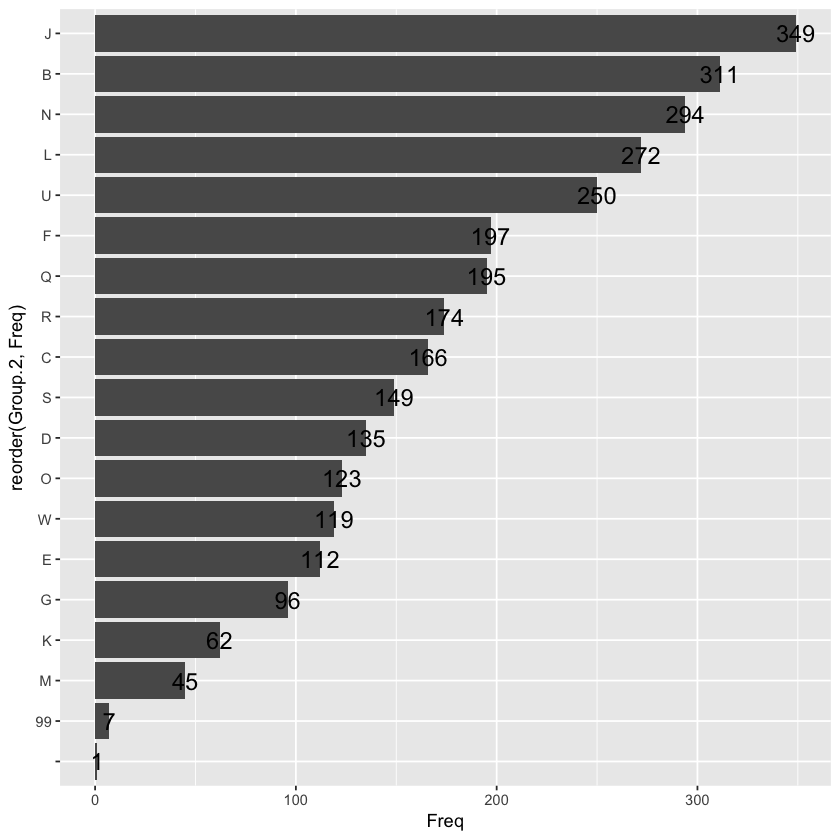

In [9]:
#prepare a dataframe with neighborhood and category only
ds_seattle_neighborhood <- data.frame(neighborhood = seattle$District.Sector, type = seattle$Summarized.Offense.Description)

#filter only incidents of type VEHICLE THEFT
ds_seattle_neighborhood_only_vehicle_theft <- ds_seattle_neighborhood[ds_seattle_neighborhood$type ==  "VEHICLE THEFT",]

#Use table to count elements and agregate by Type and neighborhood
items_sum_seattle_neighborhood = as.data.frame(table(ds_seattle_neighborhood_only_vehicle_theft))
items_sum_seattle_neighborhood_agg <- aggregate(items_sum_seattle_neighborhood[c("Freq")], by=list(items_sum_seattle_neighborhood$type, items_sum_seattle_neighborhood$neighborhood), "sum")

#Do some cleaning to remove unnecesary data from table
items_sum_seattle_neighborhood_agg <- items_sum_seattle_neighborhood_agg[items_sum_seattle_neighborhood_agg$Freq > 0,]

#Plot an ordered chart
g4 <- ggplot(items_sum_seattle_neighborhood_agg, aes(x = reorder(Group.2, Freq), y = Freq))
g4 + geom_bar(stat = "identity",position = position_stack(reverse = TRUE))  + coord_flip() +
  geom_text(aes(y = Freq, label = Freq), size = 5)

### San Francisco

#### During what periods of the day are VEHICLE THEFT most common in San Francisco?

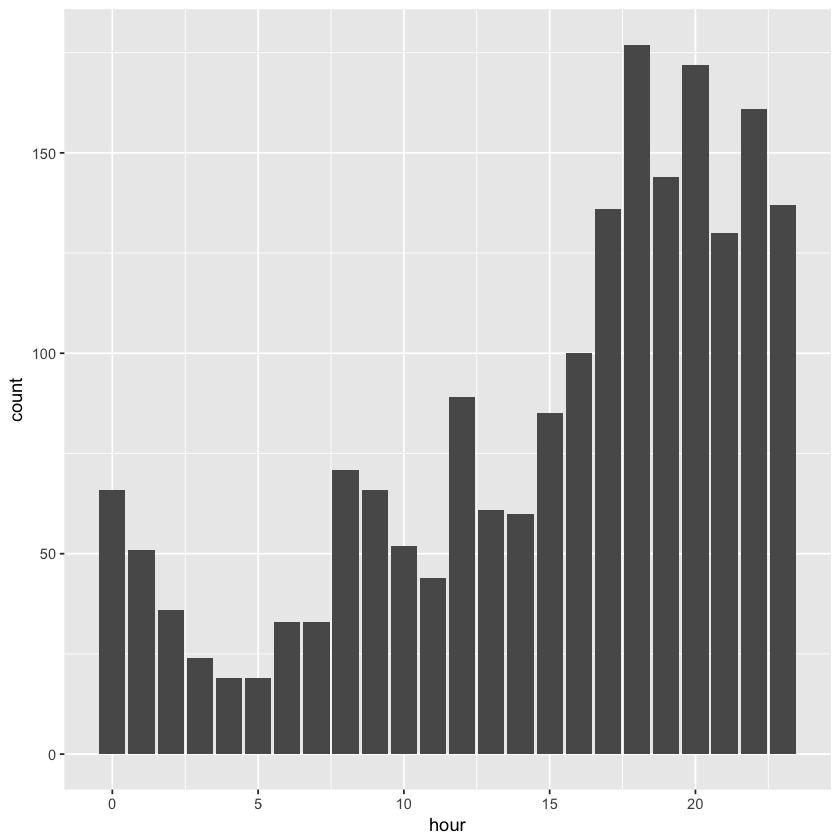

In [10]:
#prepare a dataframe with hours and category only
ds_sf_robbery <- data.frame(hour = as.numeric(format(strptime(sf$TimeHour, "%Y-%m-%d %H:%M:%S"), "%H")), type = sf$Category)
#filter only incidents of type VEHICLE THEFT
ds_sf_robbery_only <- ds_sf_robbery[ds_sf_robbery$type ==  "VEHICLE THEFT",]

g3 <- ggplot(ds_sf_robbery_only, aes(hour))
g3  +  geom_bar()

#### What other type of offenses occurs during evening hours?

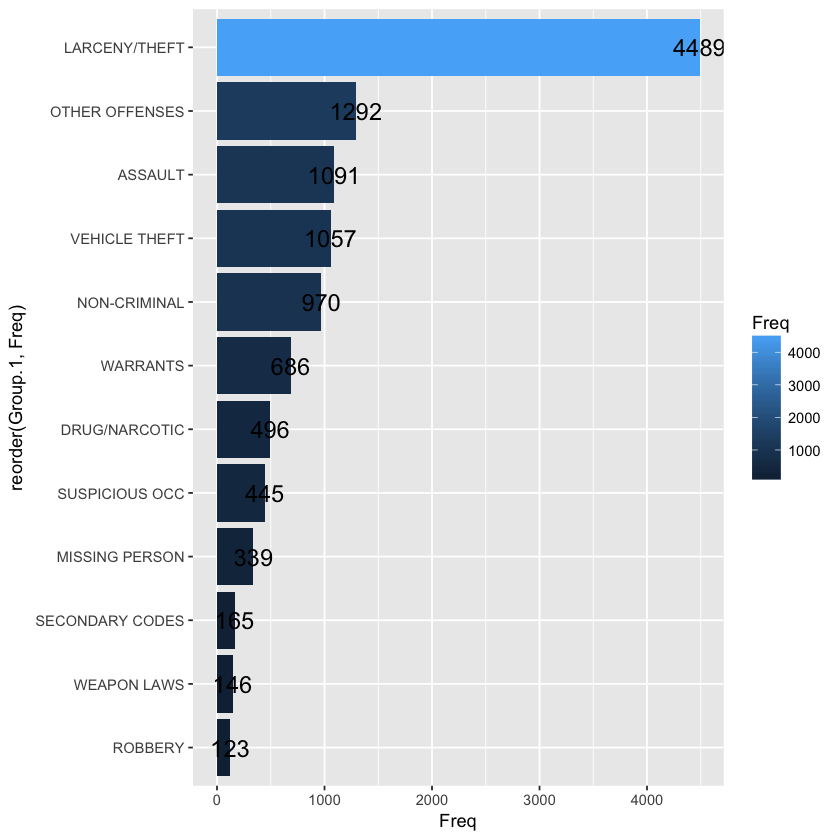

In [11]:
#prepare a dataframe with hours and category only
ds_sf_evening <- data.frame(hour = as.numeric(format(strptime(sf$TimeHour, "%Y-%m-%d %H:%M:%S"), "%H")), type = sf$Category)
#filter only incidents that occur during evening (between 5 pm and 11 pm)
ds_sf_evening_only <- ds_sf_evening[ds_sf_evening$hour >  16 & ds_sf_evening$hour <= 23,]

#Use table to count elements and agregate by Type
items_sum_sf_evening_only = as.data.frame(table(ds_sf_evening_only))
items_sum_sf_evening_only_agg <- aggregate(items_sum_sf_evening_only[c("Freq")], by=list(items_sum_sf_evening_only$type), "sum")

#Remove types with less that 100 occurences
items_sum_sf_evening_only_agg <- items_sum_sf_evening_only_agg[items_sum_sf_evening_only_agg$Freq > 100,]

#Plot an ordered chart
g4 <- ggplot(items_sum_sf_evening_only_agg, aes(x = reorder(Group.1, Freq), y = Freq, fill = Freq))
g4 + geom_bar(stat = "identity",position = position_stack(reverse = TRUE))  + coord_flip()  +
  geom_text(aes(y = Freq, label = Freq), size = 5)